Importing necessary Libraries to carry out the analysis of the dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**TASK 0 : ABOUT THE** **DATASET**

Creating a dataframe using the pandas read_csv function

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')

Displaying basic characteristics of the dataset and understanding them

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("Dataset shape:", df.shape)

Dataset shape: (891, 12)


In [ ]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]>

In [ ]:
print("Dataset size:",df.size)

Dataset size: 10692


In [ ]:
print("Missing values:", df.isnull().sum())

Missing values: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
print("Duplicated rows:", df.duplicated().sum())

Duplicated rows: 0


**TASK 1 : DESCRIPTIVE STATISTICS**

By doing a descriptive analysis we can study about the overall trends present in the dataset

*1.Summary statistics for numerical* *columns*

In [ ]:
df[['Age','Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


**What it does:**

df.describe() generates summary statistics for numerical columns.
It includes:
Count: Number of non-null values.
Mean: The average value.
Standard deviation (std): A measure of data spread.
Min: Minimum value in the column.
25% (Q1): First quartile (lower 25% of data).
50% (Q2/Median): Middle value.
75% (Q3): Third quartile (upper 25% of data).
Max: Maximum value.

**Why it's useful:**

Helps understand distributions and identify outliers.
Useful for comparing different features.
Example: A high standard deviation in Fare suggests wide variation in ticket prices.

*2. Summary Statistics for Categorical data*

In [ ]:
df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**What it does:**

describe(include=['O']) generates summary statistics for categorical (object-type) columns.
It includes:
Count: Number of non-null values.
Unique: Number of distinct categories.
Top: Most frequent category.
Freq: Frequency of the most common category.

**Why it's useful:**

Identifies dominant categories.
Example: If "Sex" has "male" as the top category with a frequency of 577, we learn that most passengers were male.

*3.Check Skewness of the Numerical Features*

In [ ]:
numerical_features = df.select_dtypes(include=np.number)
print("Skewness:", numerical_features.skew())

Skewness: PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64


**What it does:**

df.skew() calculates skewness for numerical columns.
Skewness measures how asymmetrical the data distribution is:
0 = perfectly symmetrical (normal distribution).
Positive (>0) = right-skewed (long tail on the right).
Negative (<0) = left-skewed (long tail on the left).

**Why it's useful:**

Identifies need for transformations (e.g., log transformation if data is highly skewed).
Example: Fare is often right-skewed, meaning a few passengers paid much higher fares than others.

*4.Check mode for categorical Features*

In [ ]:
print("Mode of the categorical columns:",df.mode().iloc[0])

Mode of the categorical columns: PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object


**What it does:**

df.mode() finds the most common (mode) value for each column.
.iloc[0] selects the first row of the mode (since there can be multiple modes).

**Why it's useful:**

Identifies the most frequent category in categorical variables.
Example: If the mode of "Embarked" is "S", it means most passengers boarded at "Southampton".

*5.Count Unique Values in Categorical Columns*

In [ ]:
print(df['Sex'].value_counts())
print(df['Embarked'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


**What it does:**

df["Sex"].value_counts() counts the number of times each category appears in the "Sex" column.
df["Embarked"].value_counts() does the same for "Embarked".

**Why it's useful:**

Helps understand categorical distributions.
Example: If "Sex" shows 577 males and 314 females, it confirms more men were on board.

*6.Visualizing distributions*

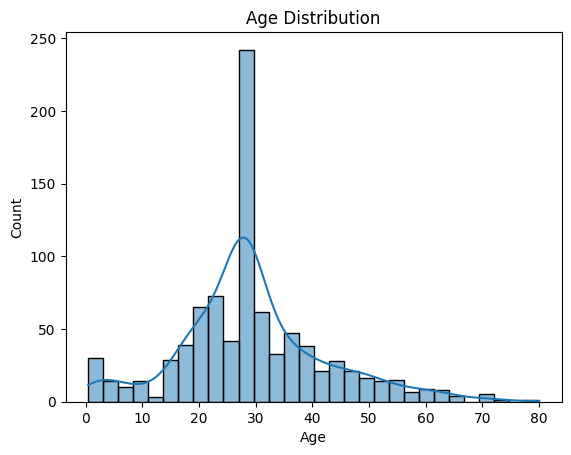

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mode())
sns.histplot(df['Age'], bins=30,kde = True)
plt.title("Age Distribution")
plt.show()

**What it does:**

sns.histplot(df['Age'].dropna(), bins=30, kde=True):
Creates a histogram with 30 bins.
kde=True adds a smooth curve to show distribution.

**Why it's useful:**

Reveals the age distribution of passengers.
Helps detect age groups with more passengers.
Example: A peak around 20-30 years suggests many passengers were young adults.

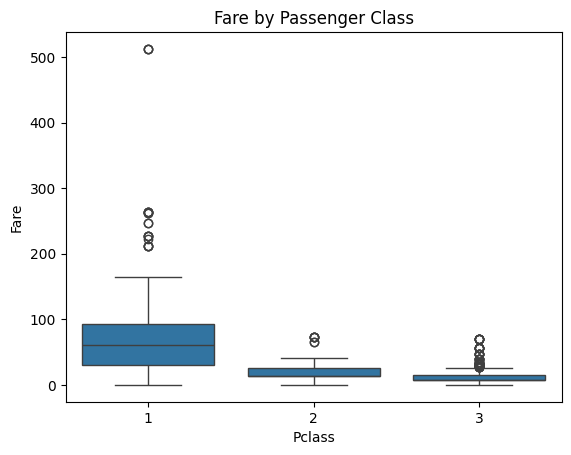

In [ ]:
sns.boxplot(x="Pclass", y="Fare", data=df)
plt.title("Fare by Passenger Class")
plt.show()

**What it does:**

sns.boxplot(x='Pclass', y='Fare', data=df):
Creates a boxplot to show how Fare varies across Pclass (Passenger Class: 1st, 2nd, 3rd).
Boxplot explanation:
The box represents Q1 to Q3 (middle 50% of data).
The line inside the box is the median.
The "whiskers" extend to the minimum and maximum values (excluding outliers).
Points outside the whiskers are outliers (extremely high or low fares).

**Why it's useful:**

Shows how much passengers paid in each class.
Example: Pclass = 1 passengers paid much higher fares than Pclass = 3.

**TASK 2 : CORRELATION AND COVARIANCE**

Correlation and covariance helps analyse relationships between the numerical features

In [ ]:
correlation_matrix = df.select_dtypes(include=np.number).corr()
print(correlation_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


**What it does:**

df.corr() computes the correlation coefficient between numerical features.
Correlation measures the relationship between two variables:
+1 → Perfect positive correlation (both variables increase together).
-1 → Perfect negative correlation (one increases, the other decreases).
0 → No correlation.

**Why it's useful:**

Helps identify relationships between features.
Example: If Survived is negatively correlated with Pclass, it means higher-class passengers had a higher survival rate.

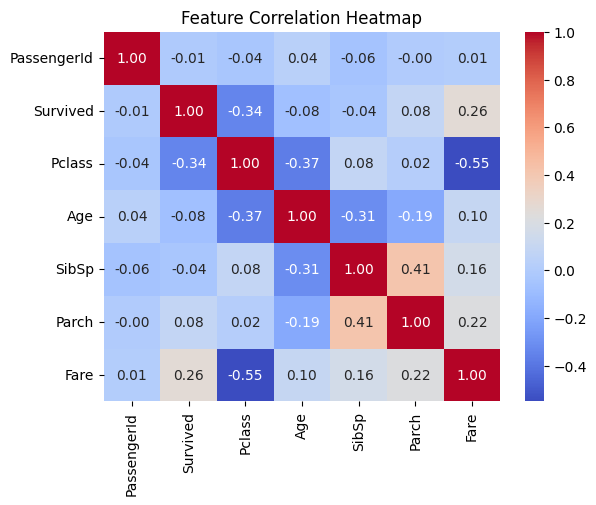

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

**What it does:**

sns.heatmap() creates a heatmap to visualize correlations.
Parameters:
annot=True → Displays correlation values inside each cell.
cmap='coolwarm' → Uses a blue-red color scheme (blue for negative, red for positive correlation).
fmt=".2f" → Formats values to two decimal places.

**Why it's useful:**

Makes it easy to see strong correlations.
Example:
Fare and Pclass → Negatively correlated (higher-class passengers paid more).
SibSp (siblings/spouses aboard) and Parch (parents/children aboard) → Positively correlated (families traveled together)

In [ ]:
print(df.select_dtypes(include=np.number).cov())

              PassengerId  Survived     Pclass         Age      SibSp  \
PassengerId  66231.000000 -0.626966  -7.561798  138.696504 -16.325843   
Survived        -0.626966  0.236772  -0.137703   -0.551296  -0.018954   
Pclass          -7.561798 -0.137703   0.699015   -4.496004   0.076599   
Age            138.696504 -0.551296  -4.496004  211.019125  -4.163334   
SibSp          -16.325843 -0.018954   0.076599   -4.163334   1.216043   
Parch           -0.342697  0.032017   0.012429   -2.344191   0.368739   
Fare           161.883369  6.221787 -22.830196   73.849030   8.748734   

                Parch         Fare  
PassengerId -0.342697   161.883369  
Survived     0.032017     6.221787  
Pclass       0.012429   -22.830196  
Age         -2.344191    73.849030  
SibSp        0.368739     8.748734  
Parch        0.649728     8.661052  
Fare         8.661052  2469.436846  


**What it does:**

df.cov() computes the covariance between numerical columns.
Covariance tells us:
If two features increase or decrease together → Positive covariance.
If one feature increases while the other decreases → Negative covariance.

**Why it's useful:**

Unlike correlation, covariance values depend on scale, so it's not as standardized.
Example:
High positive covariance between SibSp and Parch confirms that families traveled together.
A negative covariance between Pclass and Fare shows that higher-class passengers paid higher fares

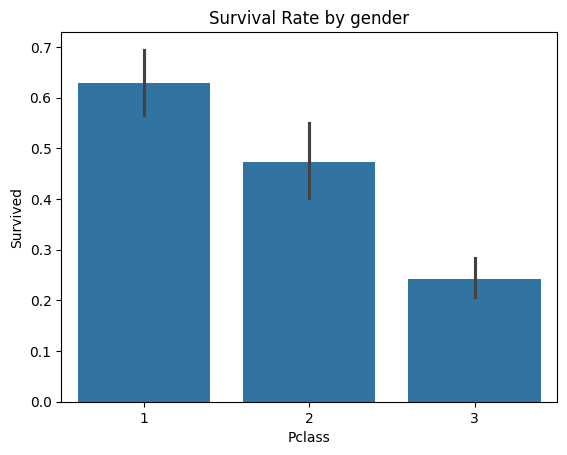

In [ ]:
sns.barplot(x='Pclass',y='Survived',data=df)
plt.title("Survival Rate by gender")
plt.show()

**What it does:**

sns.barplot(x="Pclass", y="Survived", data=df):
Groups survival rates by passenger class (Pclass).
Each bar height represents the mean survival rate.

**Why it's useful:**

Shows which class had higher survival rates.
Example: Pclass = 1 passengers had the highest survival rate, while Pclass = 3 had the lowest.

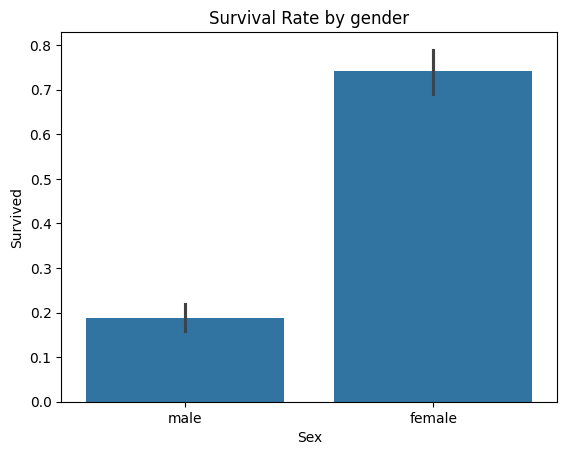

In [ ]:
sns.barplot(x='Sex',y='Survived',data=df)
plt.title("Survival Rate by gender")
plt.show()

**What it does:**

sns.barplot(x="Sex", y="Survived", data=df):
Groups survival rates by gender.
Displays the mean survival rate for males and females.

**Why it's useful:**

Highlights gender-based survival trends.
Example: Women had a much higher survival rate than men, confirming the “Women and children first” policy

**TASK 3 : QUANTILES AND RANGES**

This hepls us to find the outliers and understand their value distribution

In [ ]:
Q1 = df.select_dtypes(include = np.number).quantile(0.25)
Q2 = df.select_dtypes(include = np.number).quantile(0.50)
Q3 = df.select_dtypes(include = np.number).quantile(0.75)

print("First quartile:",Q1)
print("Median:",Q2)
print("Third quartile:",Q3)

First quartile: PassengerId    223.5000
Survived         0.0000
Pclass           2.0000
Age             20.1250
SibSp            0.0000
Parch            0.0000
Fare             7.9104
Name: 0.25, dtype: float64
Median: PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
Name: 0.5, dtype: float64
Third quartile: PassengerId    668.5
Survived         1.0
Pclass           3.0
Age             38.0
SibSp            1.0
Parch            0.0
Fare            31.0
Name: 0.75, dtype: float64


**What it does:**

df.quantile(0.25): Computes Q1 (25th percentile) → Lower Quartile
df.quantile(0.50): Computes Q2 (50th percentile / Median) → Middle value
df.quantile(0.75): Computes Q3 (75th percentile) → Upper Quartile

**Why it's useful:**

Quartiles help understand data distribution.
Q1 & Q3 help define the Interquartile Range (IQR), used to detect outliers.
Example: If Fare has:
Q1 = $8.05$
Q2 (median) = $14.45$
Q3 = $31.00$,
then most passengers paid fares between $8.05$ and $31.00$

In [ ]:
IQR = Q3 - Q1
print("Interquartile Range:",IQR)

Interquartile Range: PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
Age             17.8750
SibSp            1.0000
Parch            0.0000
Fare            23.0896
dtype: float64


**What it does:**

IQR = Q3 - Q1: Computes the Interquartile Range (range of the middle 50% of the data).

**Why it's useful:**

IQR helps detect outliers.
Smaller IQR → Data is tightly packed.
Larger IQR → Data is spread out.
Example: If Fare has IQR = $22.95$, we know 50% of passengers paid within a $22.95$ range.


In [ ]:
outliers = df.select_dtypes(include =np.number)[(df.select_dtypes(include =np.number) > Q3 + 1.5 * IQR) | (df.select_dtypes(include =np.number) < Q1 - 1.5 * IQR)]
print("Outliers detected:", outliers.dropna(how='all') )

Outliers detected:      PassengerId  Survived  Pclass  Age  SibSp  Parch     Fare
1            NaN       NaN     NaN  NaN    NaN    NaN  71.2833
7            NaN       NaN     NaN  NaN    3.0    1.0      NaN
8            NaN       NaN     NaN  NaN    NaN    2.0      NaN
10           NaN       NaN     NaN  NaN    NaN    1.0      NaN
13           NaN       NaN     NaN  NaN    NaN    5.0      NaN
..           ...       ...     ...  ...    ...    ...      ...
871          NaN       NaN     NaN  NaN    NaN    1.0      NaN
879          NaN       NaN     NaN  NaN    NaN    1.0  83.1583
880          NaN       NaN     NaN  NaN    NaN    1.0      NaN
885          NaN       NaN     NaN  NaN    NaN    5.0      NaN
888          NaN       NaN     NaN  NaN    NaN    2.0      NaN

[293 rows x 7 columns]


**What it does:**

Detects outliers using the 1.5 * IQR rule:
Lower Bound: Q1 - 1.5 * IQR
Upper Bound: Q3 + 1.5 * IQR
Identifies values beyond these bounds as outliers.
dropna(how='all'): Removes rows where all values are NaN (no outliers in those columns).

**Why it's useful:**

Identifies extreme values that might be errors or rare cases.
Example:
In Fare, very high values ($>512$) are outliers (wealthy passengers).
In Age, extreme old ages might be outliers (e.g., if someone is 200 years old, it’s likely an error)

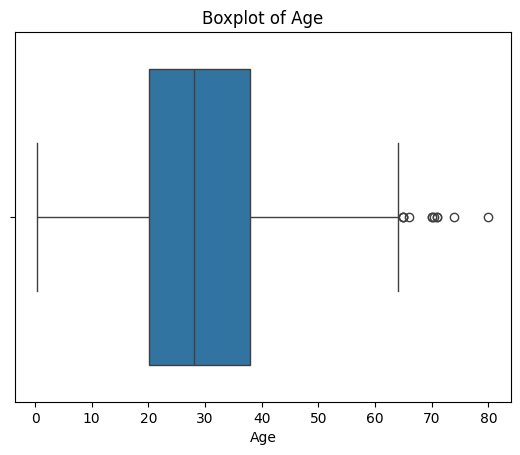

In [ ]:
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.show()

**What it does:**

sns.boxplot(x=df['Age']): Boxplot for Age.
Boxplot elements:
Box → Middle 50% of data (IQR: Q1 to Q3).
Line inside the box → Median (Q2).
Whiskers → Extend to min & max values within 1.5 * IQR.
Dots outside whiskers → Outliers.

**Why it's useful:**

Shows data spread and outliers.
Example:
If there are dots far from the whiskers, these represent outliers (very old passengers

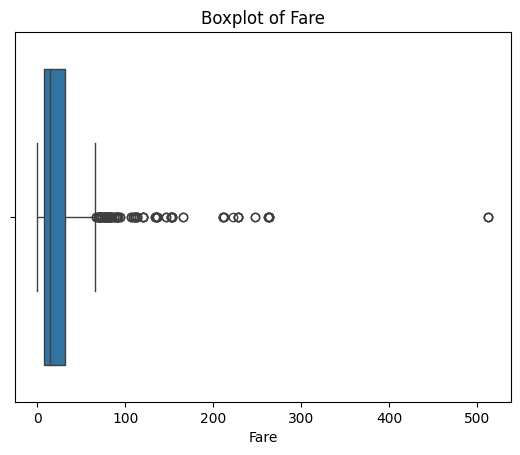

In [ ]:
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare")
plt.show()

**What it does:**

sns.boxplot(x=df['Fare']): Boxplot for Ticket Fare.

**Why it's useful:**

Identifies outliers in ticket prices.
Example:
Most fares cluster below $100$, but outliers exist above $500$ (rich passengers in 1st class).

**TASK 4 : GROUP WISE OPERATIONS**

Helps to analyse the trends based on the categories

In [ ]:
print(df.groupby('Sex')['Survived'].mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


**What it does:**

df.groupby('Sex')['Survived'].mean():
Groups passengers by Sex (Male and Female).
Computes the mean survival rate for each gender.

In [ ]:
print(df.groupby('Pclass')['Survived'].mean())

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


**What it does:**

df.groupby('Pclass')['Survived'].mean():
Groups passengers by Pclass (1st, 2nd, 3rd class).
Computes the mean survival rate for each class.

In [ ]:
print(df.groupby(['Sex','Pclass'])['Survived'].mean())

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


**What it does:**

Groups by both gender and class.
Computes the survival rate for each combination

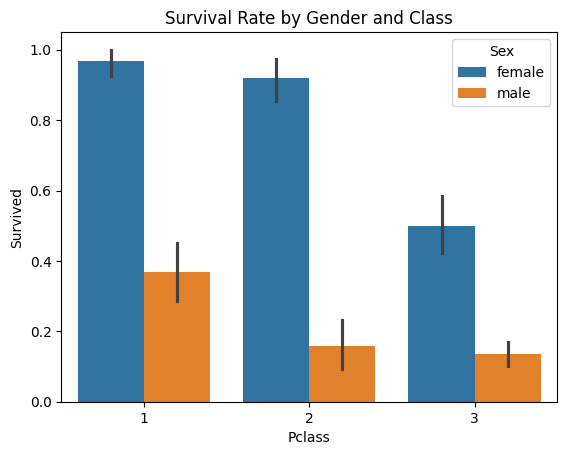

In [ ]:
sns.barplot(x="Pclass",y="Survived",hue="Sex",data=df)
plt.title("Survival Rate by Gender and Class")
plt.show()

**What it does:**

sns.barplot() creates a bar plot:
x="Pclass" → Groups by passenger class.
y="Survived" → Shows survival rate.
hue="Sex" → Separates bars by gender.

**Why it's useful:**

Clearly shows survival differences between genders in each class.
Women in all classes had a higher survival rate than men.
3rd class men had the lowest survival rate

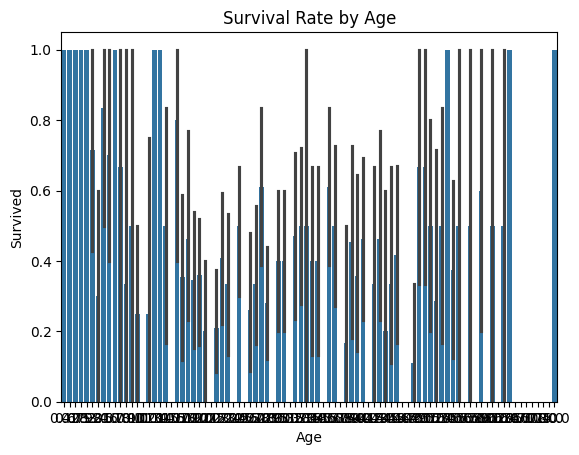

In [ ]:
sns.barplot(x="Age",y="Survived",data = df)
plt.title("Survival Rate by Age")
plt.show()

**What it does:**

Creates a bar plot to visualize survival rates for different age groups.

**Why it's useful:**

Confirms "Women and children first" policy.
Children had the highest survival rate

**TASK 5 : HANDLING MISSING DATA**

Analysing improper dataset can lead to incorrect insights, so handling missing data is crucial for proper analysis

In [ ]:
print("Missing values:", df.isnull().sum())

Missing values: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**What it does:**

df.isnull() → Checks where data is missing (True for missing values).
.sum() → Counts missing values column-wise.

In [ ]:
df.drop(columns=['Cabin'], inplace=True)

**What it does:**

Removes the 'Cabin' column from the dataset.

**Why it's useful:**

Cabin has too much missing data (687 missing values).
Instead of guessing missing values, we remove it to simplify analysis.

In [ ]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] = df["Age"].fillna(df["Age"].median(), inplace=True)

<ipython-input-73-d477d983f60a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'] = df["Age"].fillna(df["Age"].median(), inplace=True)


**What it does:**

Fills missing values in 'Age' with the median.

**Why use the median?**

'Age' has 177 missing values.
The mean (average) can be affected by outliers.
The median (middle value) is more robust.

In [ ]:
df['Embarked'].fillna({'Embarked':df['Embarked'].mode()[0]}, inplace = True)

<ipython-input-64-9114be520fcf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna({'Embarked':df['Embarked'].mode()[0]}, inplace = True)


**What it does:**

Fills missing values in 'Embarked' using the mode (most frequent value).

**Why use the mode?**

'Embarked' has only 2 missing values.
The mode represents the most common boarding location

In [ ]:
print("Missing values after handling:", df.isnull().sum())

Missing values after handling: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            891
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


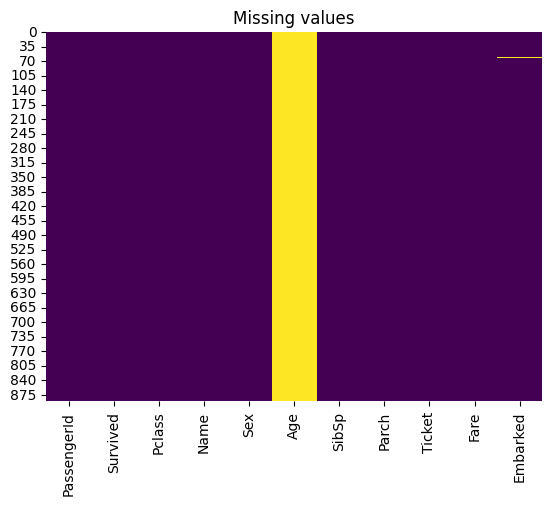

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing values")
plt.show()

**What it does**:

Creates a heatmap where:
Yellow (or bright areas) → Missing values.
Dark areas → Present values.

**Why it's useful?**

Helps visualize missing data patterns.
Before cleaning, we expect to see missing values in 'Age', 'Cabin', and 'Embarked'.
After cleaning, the heatmap should show no missing values.